In [ ]:
pip install opencv-python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import seaborn as sns

In [2]:
%cd D:\fruit-classifier-and-quality-checker-FLASK_api-master\data\Fruit_category

D:\fruit-classifier-and-quality-checker-FLASK_api-master\data\Fruit_category


## Fruits photos

In [3]:
def show_rand(x,dir_='apple'):
    if len(x)==30:
        f,ax=plt.subplots(6,5,figsize=(40,40))
        for i,file_name in enumerate(x):
            img=cv2.imread( os.path.join(dir_,file_name) )
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            
            ax[i//5][i%5].imshow(img, aspect='auto')
            ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
        plt.show()

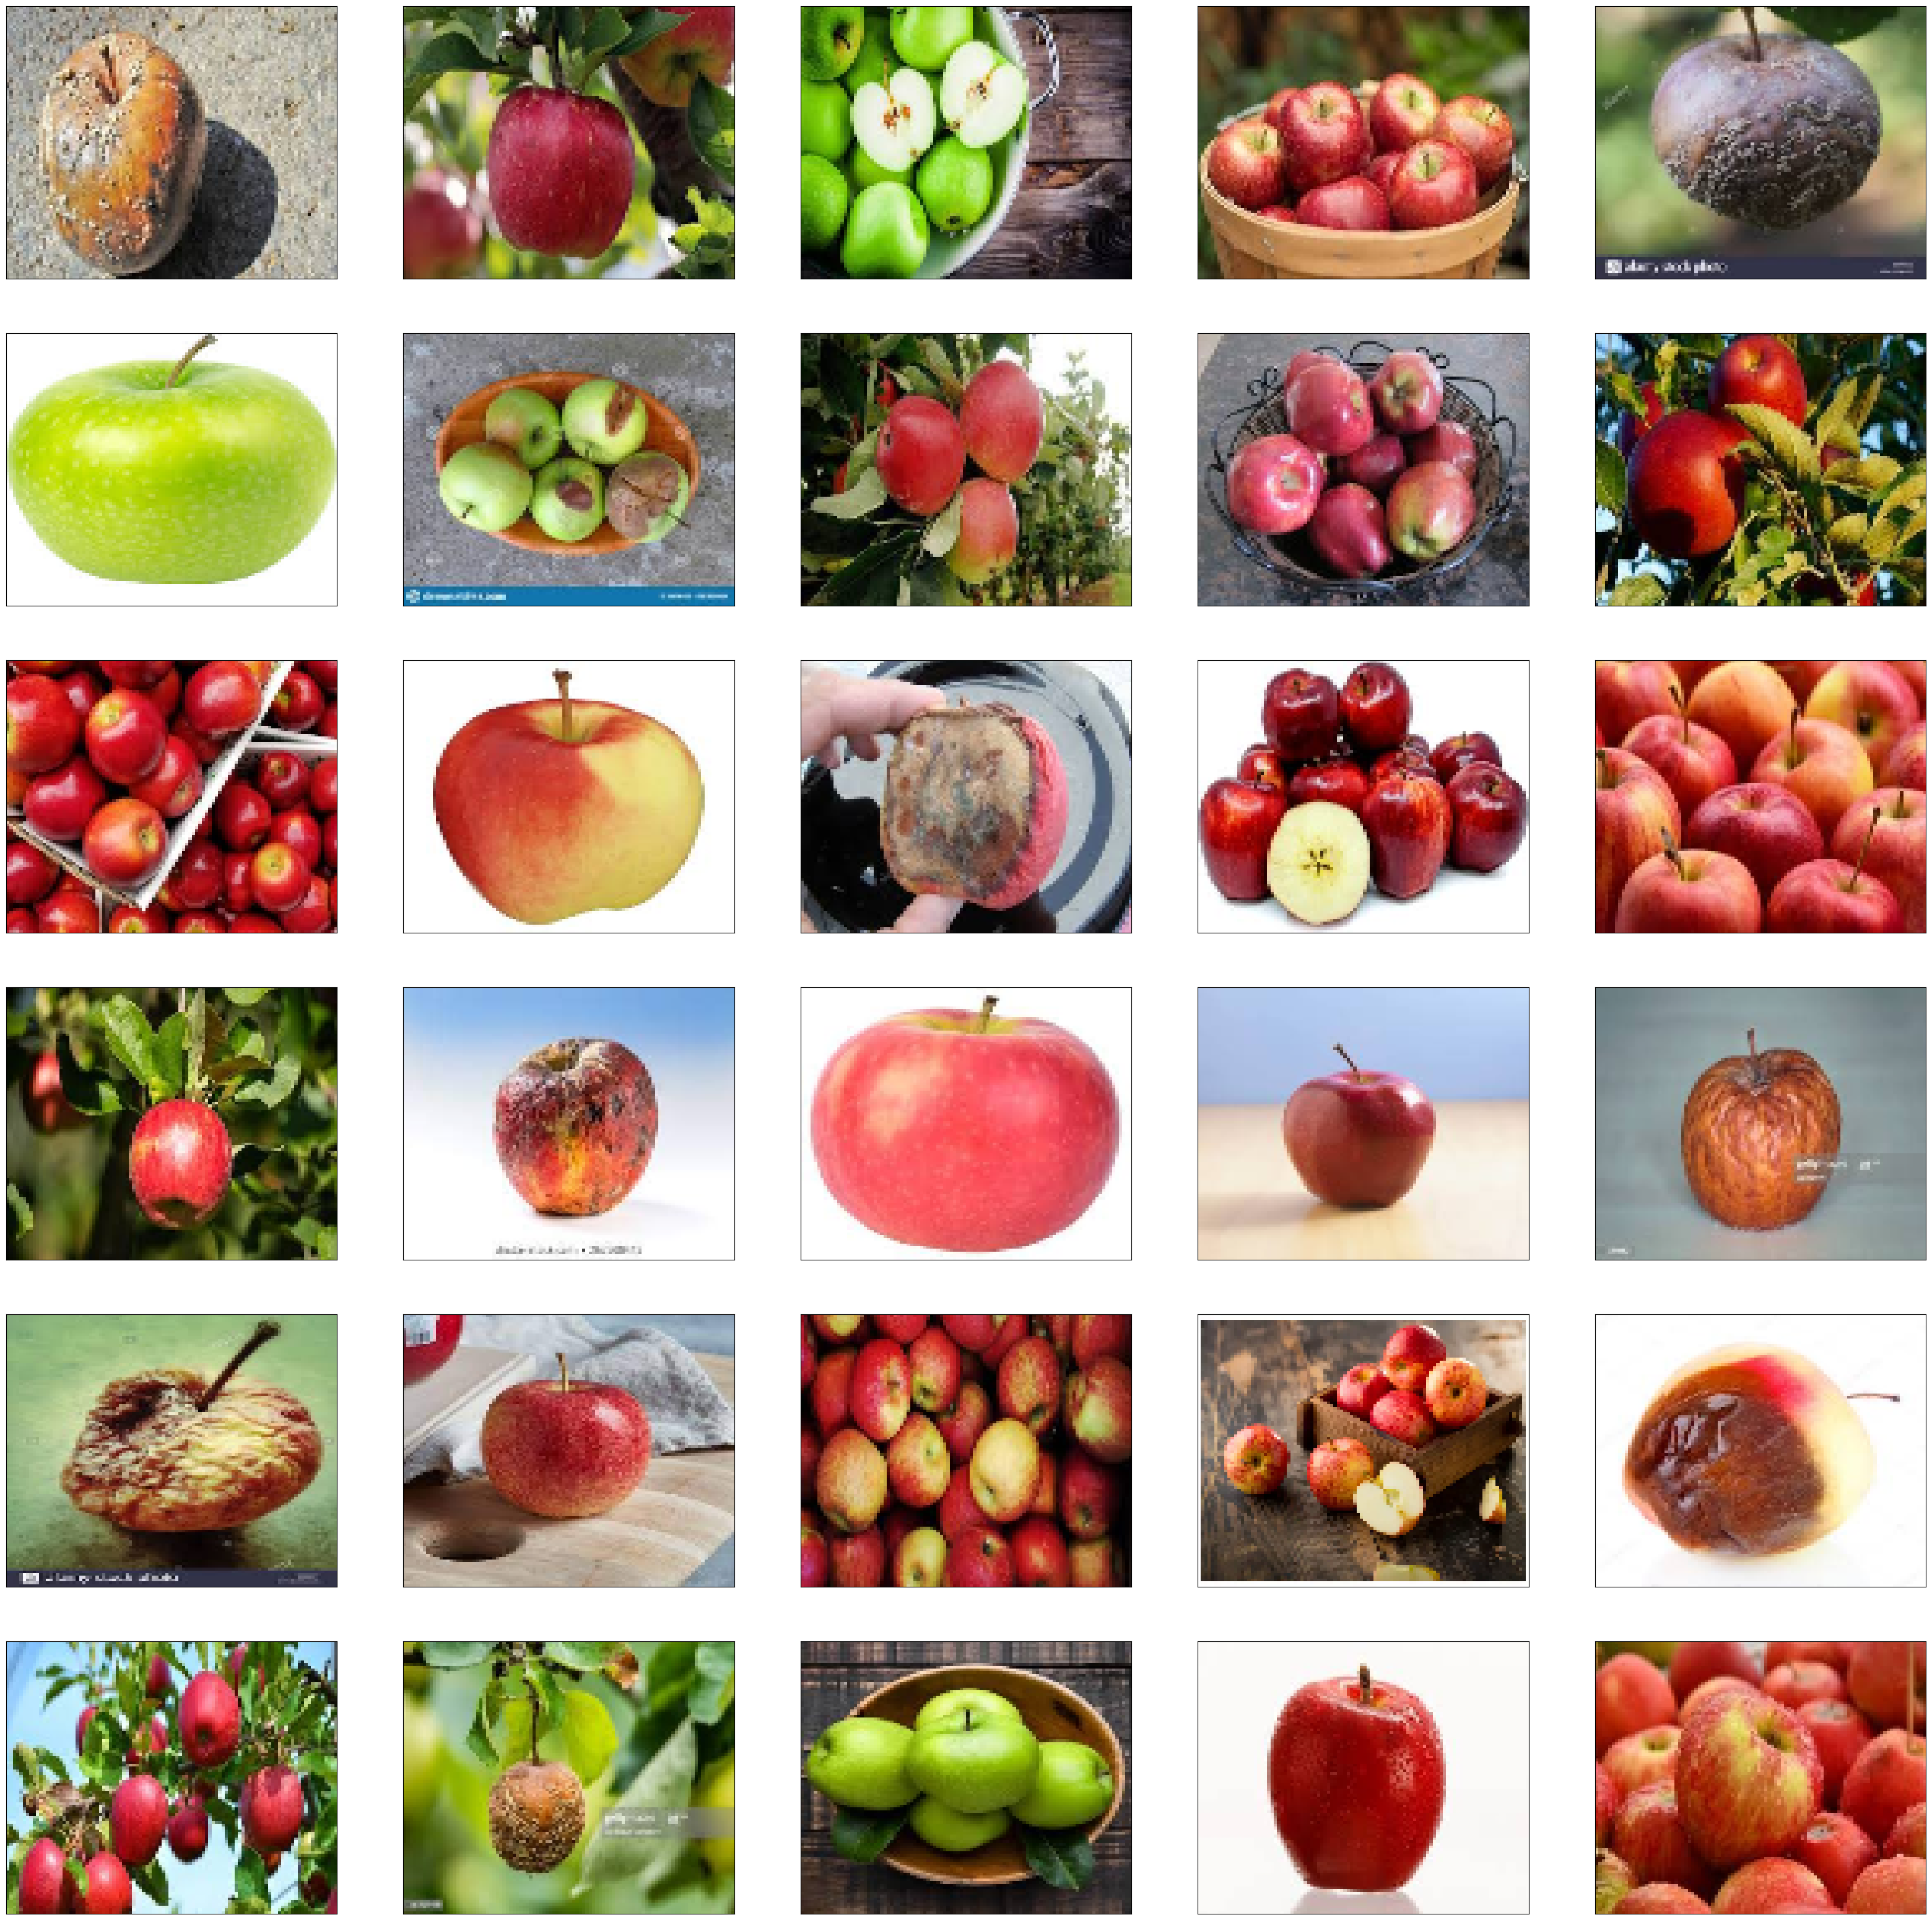

In [4]:
show_rand(random.sample(os.listdir('apple'), 30),dir_='apple')

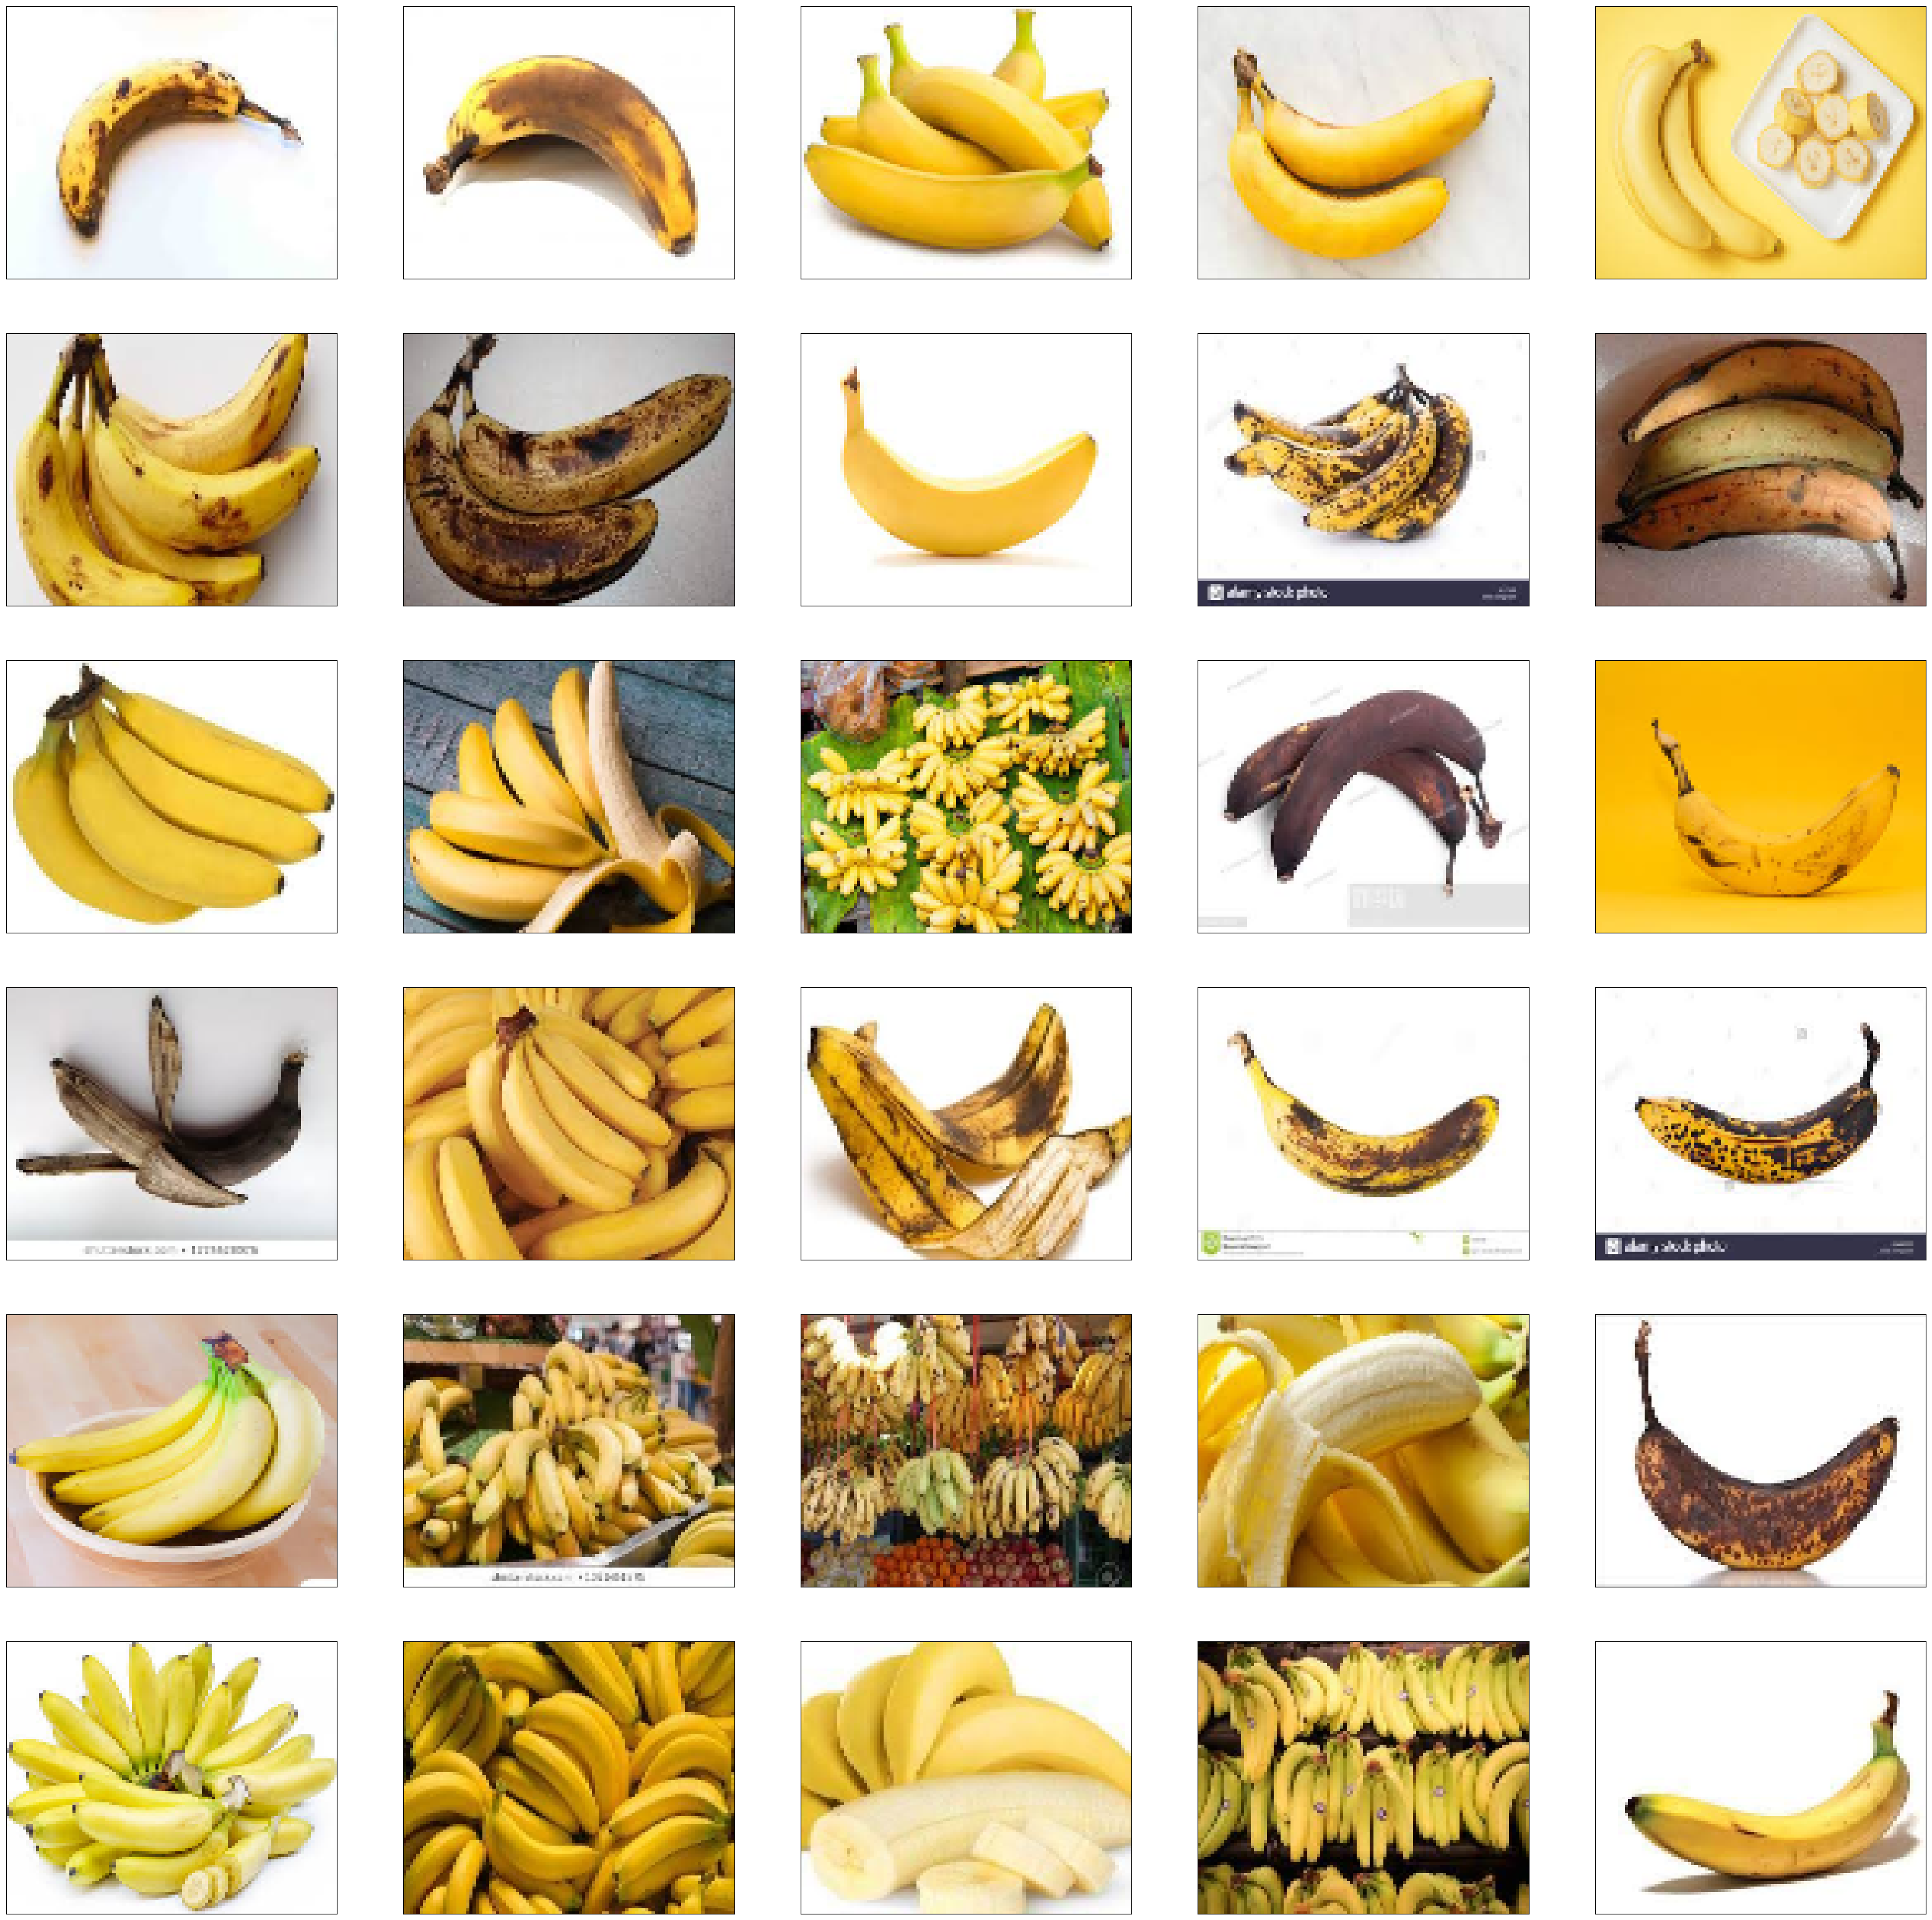

In [5]:
show_rand(random.sample(os.listdir('banana'), 30),dir_='banana')

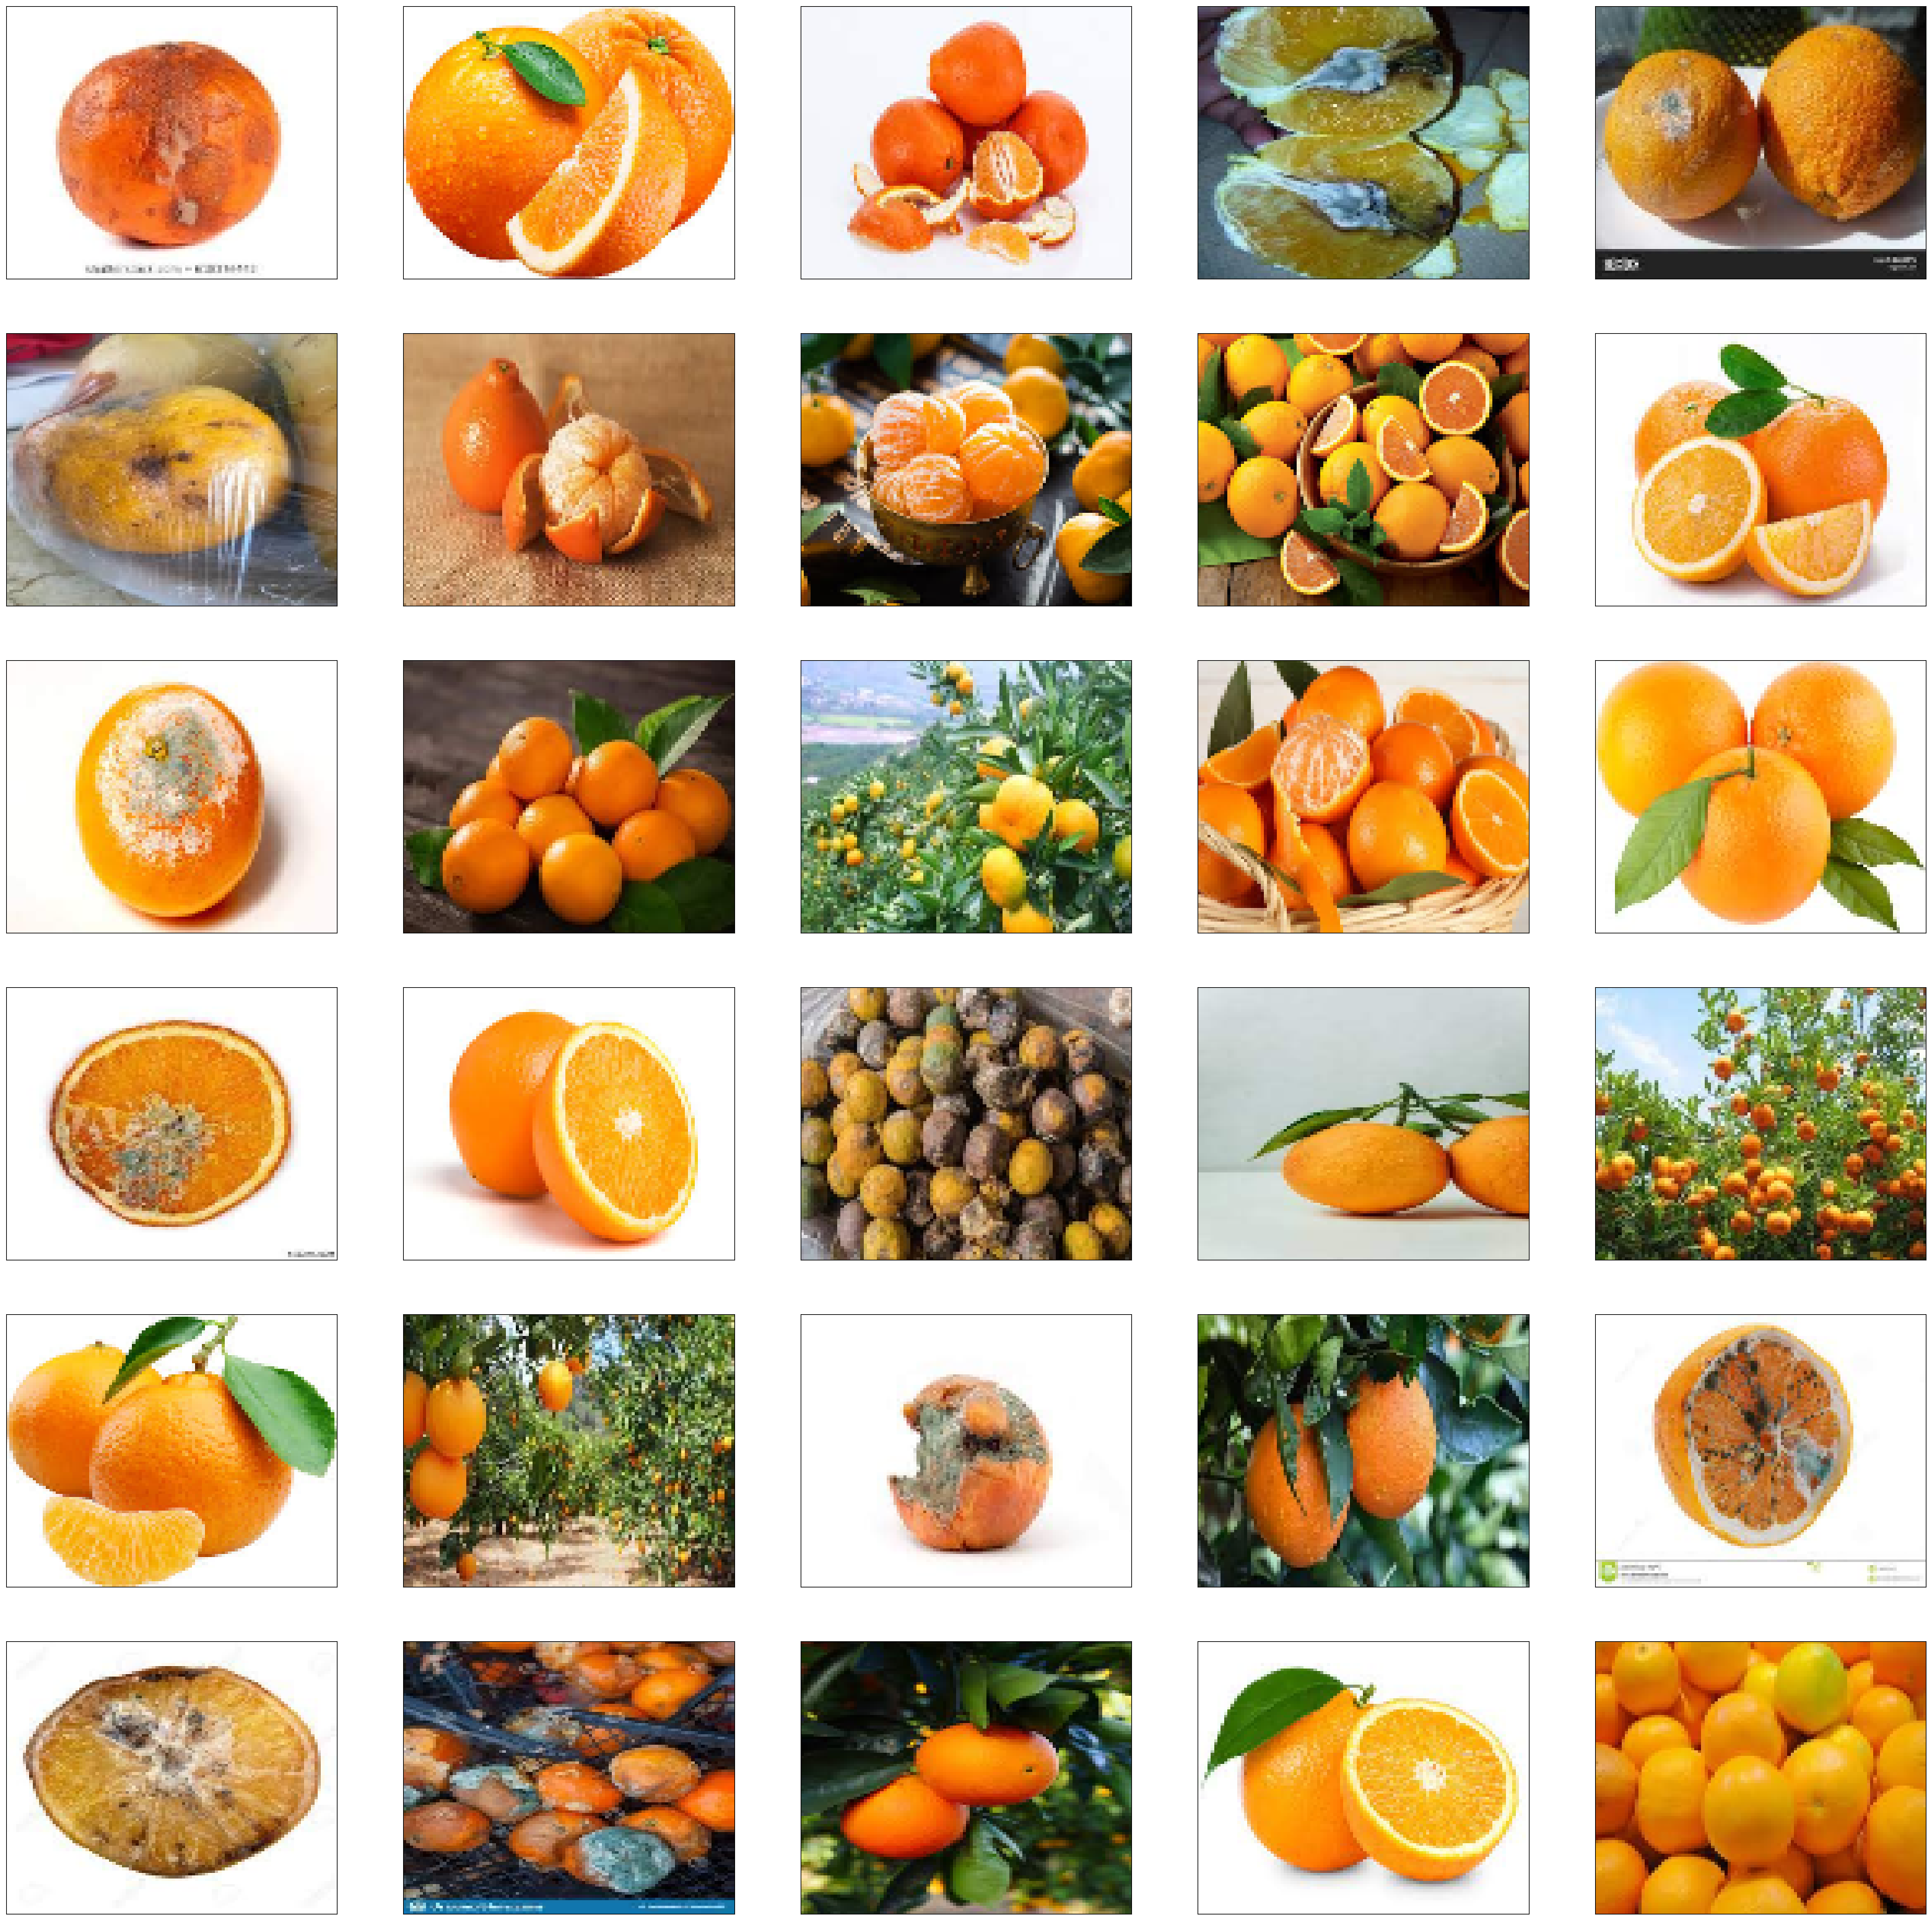

In [6]:
show_rand(random.sample(os.listdir('orange'), 30),dir_='orange')

### apple=0, banana=1, orange=2

### Rotten:1 fresh:0

>Keras has now added Train / validation split from a single directory using ImageDataGenerator:

In [12]:
import keras 
#from keras.preprocessing.image import ImageDataGenerator
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Dropout

In [8]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8f/db/e05a35451d4ba30fdc65ef168dfdc68a6939ea6afdc0101e3e77f97e

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Using cached flatbuffer

In [13]:
train_datagen = ImageDataGenerator(rescale=1.255,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.18)

In [21]:
train_generator = train_datagen.flow_from_directory(
    'D:',
    target_size=(100,100),
    batch_size=20,
    class_mode='categorical',
    subset='training') # set as training data


validation_generator = train_datagen.flow_from_directory(
    'D:', # same directory as training data
    target_size=(100,100),
    batch_size=20,
    class_mode='categorical',
    subset='validation')

Found 358 images belonging to 3 classes.
Found 77 images belonging to 3 classes.


In [22]:
train_generator.class_indices

{'apple': 0, 'banana': 1, 'orange': 2}

In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.applications import vgg16
from keras.callbacks import ModelCheckpoint


In [49]:
model=load_model('C:\Users\HP\Downloads\local_fruit_final.h5')
# model=keras.applications.VGG16(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(100,100,3)
# )

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'local_fruit_final.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [38]:
model.summary()

NameError: name 'model' is not defined

In [39]:
# Freeze first 10 the layers
for layer in model.layers[:10]:
    layer.trainable = False

NameError: name 'model' is not defined

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.categorical_crossentropy,
               metrics=['accuracy'])

NameError: name 'model' is not defined

In [41]:
check_point=ModelCheckpoint(
    filepath='C:/Users/Akhilesh/Downloads/local_fruit.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=C:/Users/Akhilesh/Downloads/local_fruit.h5

In [42]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 20,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 20,
    epochs = 100, callbacks=[check_point])

NameError: name 'model' is not defined

In [43]:
#$main
new_model=load_model('C:/Users/Akhilesh/Downloads/local_fruit_final.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'C:/Users/Akhilesh/Downloads/local_fruit_final.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [44]:
rotten_model=load_model('C:/Users/Akhilesh/Downloads/rotten.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'C:/Users/Akhilesh/Downloads/rotten.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [45]:
rotten_model.p

NameError: name 'rotten_model' is not defined

In [46]:
def show_rand_pred(x,dir_='apple', model=None, model_2=None):
    if len(x)==30:
        f,ax=plt.subplots(6,5,figsize=(40,40))
        for i,file_name in enumerate(x):
            img=cv2.imread( os.path.join(dir_,file_name) )
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            ax[i//5][i%5].set_title('Fruit:{}, quality:{}'.format(model.predict_classes(np.expand_dims(img,axis=0)),model_2.predict_classes(np.expand_dims(img,axis=0))))
            ax[i//5][i%5].imshow(img, aspect='auto')
            ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
        plt.show()

In [47]:
show_rand_pred(random.sample(os.listdir('apple'), 30), model=new_model, model_2=rotten_model)

NameError: name 'new_model' is not defined

In [ ]:
show_rand_pred(random.sample(os.listdir('banana'), 30) ,dir_='banana' ,model=new_model, model_2=rotten_model)

In [ ]:
show_rand_pred(random.sample(os.listdir('orange'), 30) ,dir_='orange' ,model=new_model, model_2=rotten_model)

> We can se our rotten classifier model performs quite descent
# Rotten pics

In [ ]:
%cd D:\projects\Fruit_flask\quality

In [ ]:
def show_rand(x,dir_='fresh'):
    if len(x)==30:
        f,ax=plt.subplots(6,5,figsize=(40,40))
        for i,file_name in enumerate(x):
            img=cv2.imread( os.path.join(dir_,file_name) )
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            
            ax[i//5][i%5].imshow(img, aspect='auto')
            ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
        plt.show()

In [ ]:
show_rand(random.sample(os.listdir('fresh'), 30))

In [ ]:
show_rand(random.sample(os.listdir('Rotten'), 30),dir_='Rotten')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.255,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.26)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'D:\projects\Fruit_flask\quality',
    target_size=(100,100),
    batch_size=20,
    class_mode='binary',
    subset='training',
    shuffle=True,
    classes={'Rotten':1,
             'fresh':0}) # set as training data


validation_generator = train_datagen.flow_from_directory(
    'D:\projects\Fruit_flask\quality', # same directory as training data
    target_size=(100,100),
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    classes={'Rotten':1,
             'fresh':0})

In [ ]:
train_generator.class_indices, validation_generator.class_indices

In [ ]:
train_generator.classes

In [ ]:
rotten_model=load_model('C:/Users/Akhilesh/Downloads/rotten.h5')

In [ ]:
rotten_model.summary()

In [ ]:
for layer in rotten_model.layers[:5]:
    layer.trainable = False

In [ ]:
lr_rate=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point_2=ModelCheckpoint(
    filepath='C:/Users/Akhilesh/Downloads/local_rotten_lr2.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

In [ ]:
rotten_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006), loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
history=rotten_model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 20,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 20,
    epochs = 100, callbacks=[check_point_2])

In [ ]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
#$main
rotten_model=load_model('C:/Users/Akhilesh/Downloads/local_rotten_lr2_final.h5')

In [ ]:
def show_rand_pred(x,dir_='fresh', model=None, model_2=None):
    if len(x)==30:
        f,ax=plt.subplots(6,5,figsize=(40,40))
        for i,file_name in enumerate(x):
            img=cv2.imread( os.path.join(dir_,file_name) )
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            ax[i//5][i%5].set_title('Fruit:{}, quality:{}'.format(model.predict_classes(np.expand_dims(img,axis=0)),model_2.predict_classes(np.expand_dims(img,axis=0))))
            ax[i//5][i%5].imshow(img, aspect='auto')
            ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
        plt.show()

## Final
### Apple:0, banana:1, Orange:2
### Rotten:0, Fresh:1

> Check for Rottten ones First

In [ ]:
show_rand_pred(random.sample(os.listdir('Rotten'), 30),dir_='Rotten',model=new_model, model_2=rotten_model)

In [ ]:
show_rand_pred(random.sample(os.listdir('Rotten'), 30),dir_='Rotten',model=new_model, model_2=rotten_model)

> Let's see our model predtions on Fresh fruits

In [ ]:
show_rand_pred(random.sample(os.listdir('fresh'), 30),dir_='fresh',model=new_model, model_2=rotten_model)

In [ ]:
show_rand_pred(random.sample(os.listdir('fresh'), 30),dir_='fresh',model=new_model, model_2=rotten_model)

# Best Combo in Fruit detection + Quality Dection

## Now lets check randomly by downloading our images from Internet

In [ ]:
def upload_check(name,model_1=None, model_2=None):
    path=os.path.join(r'C:\Users\Akhilesh\Downloads',name)
    img=cv2.imread(path)
    img=cv2.resize(img,(100,100))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6,6))
    plt.title('Fruit:{}, quality:{}'.format(model_1.predict_classes(np.expand_dims(img,axis=0)),model_2.predict_classes(np.expand_dims(img,axis=0))))
    plt.imshow(img)

In [ ]:
upload_check('f8.jpg', new_model, rotten_model)

In [ ]:
upload_check('f11.jpg', new_model, rotten_model)

In [ ]:
path=os.path.join(r'C:\Users\Akhilesh\Downloads','f11.jpg')
img=cv2.imread(path)
img=cv2.resize(img,(100,100))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
new_model.predict(np.expand_dims(img,axis=0)),rotten_model.predict(np.expand_dims(img,axis=0))

In [ ]:
def analyse(name, model_1=None, model_2=None):
    path=os.path.join(r'C:\Users\Akhilesh\Downloads',name)
    img=cv2.imread(path)
    img=cv2.resize(img,(100,100))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    f,ax=plt.subplots(1,2, figsize=(15,6))
    
    label_q=['Fresh','Rotten']
    pred= [model_2.predict(np.expand_dims(img,axis=0))[0][0],1-model_2.predict(np.expand_dims(img,axis=0))[0][0]]
    ax[0].set_title('Quality')
    sns.barplot(label_q, pred, ax=ax[0])
    
    ax[1].set_title('Fruit')
    label_fruit=['Apple','Banana', 'Orange']
    pred=model_1.predict(np.expand_dims(img,axis=0))[0]
    sns.barplot(label_fruit, pred, ax=ax[1])
    plt.show()
    

In [ ]:
analyse('f1.jpg', new_model, rotten_model)

In [ ]:
analyse('f6.jpg', new_model, rotten_model)

In [ ]:
analyse('f8.jpg', new_model, rotten_model)

## SAVE our models Now!!!

In [ ]:
import pickle

In [ ]:
%cd D:\projects\Fruit_flask

In [ ]:
with open('model_1.pkl','wb') as f:
    pickle.dump(new_model,f)

In [ ]:
%cd C:\Users\Akhilesh